In [1]:
import pandas as pd
import numpy as np

from sklearn.cluster import DBSCAN

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 
from sklearn import metrics
from sklearn.metrics import silhouette_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import mglearn 

import plotly.plotly as py
import plotly.graph_objs as go
from plotly import tools

In [2]:
data= pd.read_csv("/home/local/BHRI/agarg/06/datasets/cdhit_features.csv")

X= data.iloc[:, 1:97]
y= data.iloc[:, -2]

for col in X.keys():
    X[col].fillna(0, inplace=True)
    
y=pd.factorize(y)[0]

In [23]:
X_train, X_test, y_train, y_test= train_test_split(X,y, random_state=0)

# Feature Scaling

sc_X= StandardScaler()
X_train= sc_X.fit_transform(X_train)
X_test= sc_X.transform(X_test)



/home/local/BHRI/agarg/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.

/home/local/BHRI/agarg/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.

/home/local/BHRI/agarg/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.



# KMeans

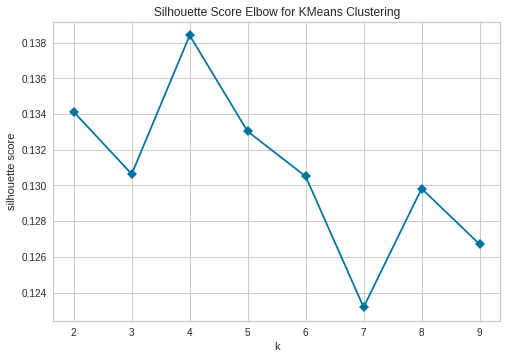

In [19]:
from yellowbrick.cluster import KElbowVisualizer

km_model= KMeans(random_state=0)

visualizer1= KElbowVisualizer(km_model, k=(2,10), metric='silhouette', timings= False)

visualizer1.fit(X_train)
visualizer1.poof()

In [76]:
kmeans= KMeans(random_state=0, n_clusters=4).fit(X_train)
labels= kmeans.labels_

In [33]:
km_pred= kmeans.predict(X_test)

<IPython.core.display.Javascript object>


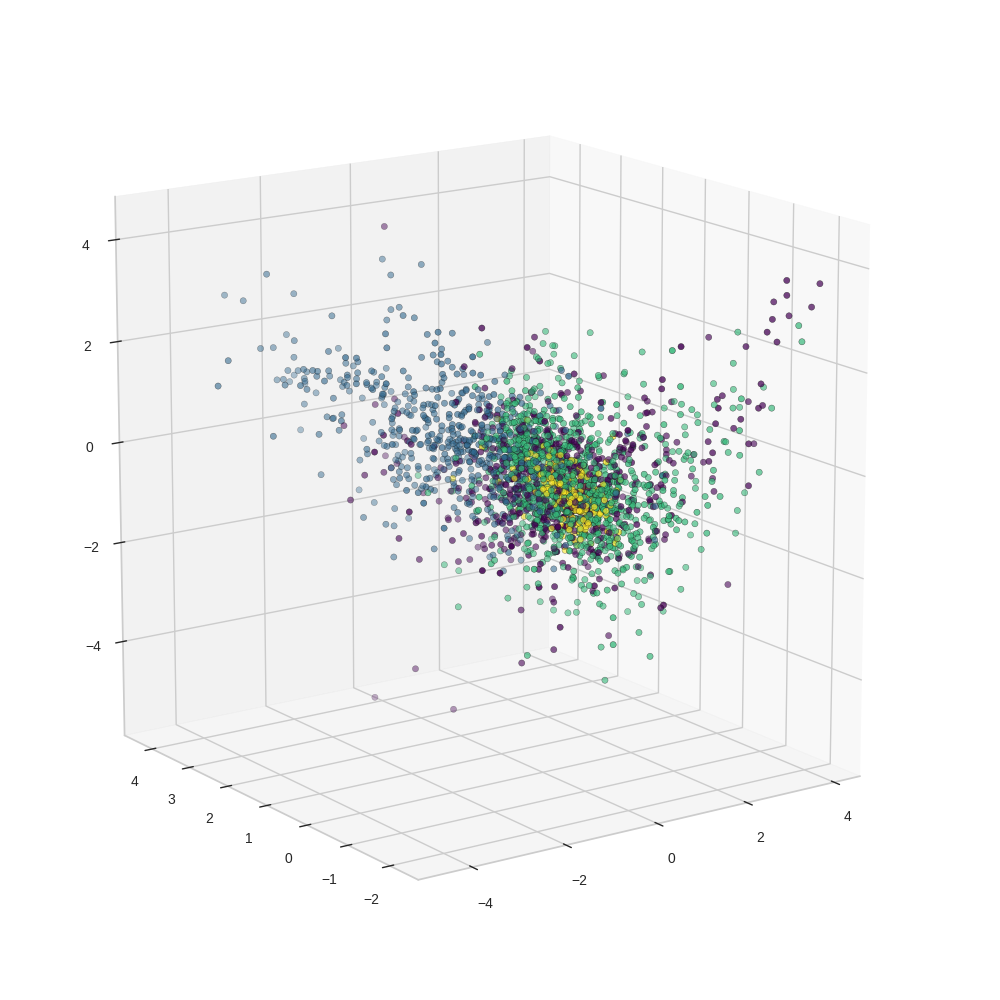

In [120]:
from mpl_toolkits.mplot3d import Axes3D

# fignum=1
fig1 = plt.figure(figsize=(10,10))
ax1 = Axes3D(fig1, rect=[0, 0, 0.95, 1], elev=48, azim=134)

ax1.scatter(X_train[:, 3], X_train[:, 0], X_train[:, 2],
           c=labels, edgecolor='k', cmap="viridis")



In [110]:
# plt.scatter(X_train[:,0], X_train[:,1], s=50, c= kmeans.labels_, cmap= "viridis")
# plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c="r", marker= "x", s=200)

# plt.show()

# DBScan

In [133]:
dbscan= DBSCAN(eps= 0.1, min_samples= 10)


In [134]:
clusters= dbscan.fit(X_train)
db_labels=  clusters.labels_


<IPython.core.display.Javascript object>


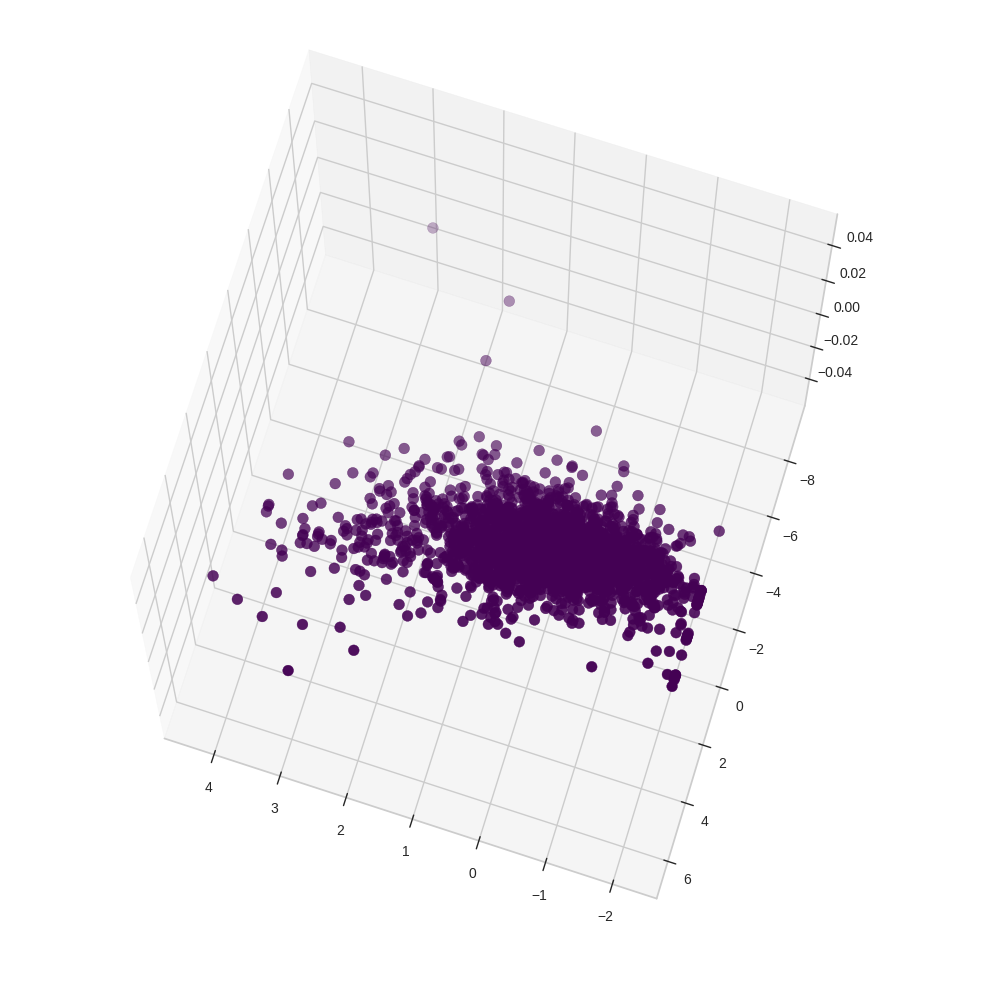

In [135]:
fig2= plt.figure(figsize=(10,10))
ax2=Axes3D(fig2, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax2.scatter(X_train[:, 0], X_train[:, 1], c= db_labels, cmap= "viridis", s=60)